In [17]:
import sys
sys.path.append('../..')
import os
import json
from pathlib import Path
import shutil


import numpy as np
import math
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from tqdm.keras import TqdmCallback

from src.Evaluation import plot_model_history, get_confusion_matrix_for_model_and_data, visualize_confusion_matrix
from src.ModelBuilder import get_MLP, get_MCDCNN, get_Time_CNN, get_FCN, get_Encoder, get_Resnet
from src.LoadData import get_all_datasets_test_train_np_arrays, get_all_datasets_names_paths
from src.Helpers import append_to_csv

In [18]:
path_to_ds_analysis_file = "../tanya/training_res.csv"
path_to_datasets = "../../datasets"
path_to_persiste = "./ds_confusion_matrices_history"
persist_history = True

In [19]:
training_res_df = pd.read_csv(path_to_ds_analysis_file)

In [20]:
datasets_names, _ = get_all_datasets_names_paths(path_to_datasets)

In [23]:
for dataset_name in datasets_names:
    print("Dataset name", dataset_name)
    df_dataset = training_res_df[training_res_df["dataset_name"] == dataset_name]
    num_conf_matr = len(df_dataset)
    if num_conf_matr > 0:
        
        curr_persist_dir = Path(path_to_persiste) / dataset_name
        #curr_persist_dir = os.path.join(path_to_persiste, dataset_name)
        if curr_persist_dir.exists() and curr_persist_dir.is_dir():
            shutil.rmtree(curr_persist_dir)
        os.mkdir(curr_persist_dir)
        
        num_horizontal = 2 
        num_vertical = math.ceil(num_conf_matr/num_horizontal)

        figure, axis = plt.subplots(num_horizontal, num_vertical)
        figure.suptitle(f"Dataset {dataset_name}", fontsize=16)
        plt.figure(figsize=(15, 15))

        conf_matrices = [json.loads(mtr) for i, mtr in df_dataset["confusion_matrix"].iteritems()]
        test_acc = [round(acc, 2) for i, acc in df_dataset["test_acc"].iteritems()]
        model_names = df_dataset["model_name"].values.tolist()
        curr_matr = 0

        for i in range(num_horizontal):
            for j in range(num_vertical):
                curr_axis = axis[i, j]
                if curr_matr < len(conf_matrices):
                    sns.heatmap(conf_matrices[curr_matr], annot=True, fmt="d", ax=curr_axis)
                    curr_axis.set_title(f"{model_names[curr_matr]}; \n Test accuracy: {test_acc[curr_matr]}")
                    curr_axis.set_ylabel('True label')
                    curr_axis.set_xlabel('Predicted label')
                curr_matr += 1

        figure.tight_layout()            
        figure.savefig(os.path.join(curr_persist_dir, "confusion_matrix.png"))
        plt.close(figure)
        
        if persist_history:
            for _, row in df_dataset.iterrows():
                history = json.loads(row["history"])
                epochs = len(history["loss"])
                model_name = row["model_name"]
                plot_model_history(history=history, epochs=epochs, path_to_persist=os.path.join(curr_persist_dir, f"history_{model_name}.png"))
        

Dataset name sony_robot


/scratch/slurm_tmpdir/job_21778843/ipykernel_2519007/844395435.py:21: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  conf_matrices = [json.loads(mtr) for i, mtr in df_dataset["confusion_matrix"].iteritems()]
/scratch/slurm_tmpdir/job_21778843/ipykernel_2519007/844395435.py:22: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  test_acc = [round(acc, 2) for i, acc in df_dataset["test_acc"].iteritems()]


Using 30 epochs. You can ignore the epochs parameter if you want to use all epochs.
Using 30 epochs. You can ignore the epochs parameter if you want to use all epochs.
Using 30 epochs. You can ignore the epochs parameter if you want to use all epochs.
Using 30 epochs. You can ignore the epochs parameter if you want to use all epochs.
Using 30 epochs. You can ignore the epochs parameter if you want to use all epochs.
Using 30 epochs. You can ignore the epochs parameter if you want to use all epochs.


<Figure size 1500x1500 with 0 Axes>

# Confusion matrix fifty_words

Dataset name fifty_words


/scratch/slurm_tmpdir/job_21778843/ipykernel_2519007/1131491492.py:21: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  conf_matrices = [json.loads(mtr) for i, mtr in df_dataset["confusion_matrix"].iteritems()]
/scratch/slurm_tmpdir/job_21778843/ipykernel_2519007/1131491492.py:22: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  test_acc = [round(acc, 2) for i, acc in df_dataset["test_acc"].iteritems()]


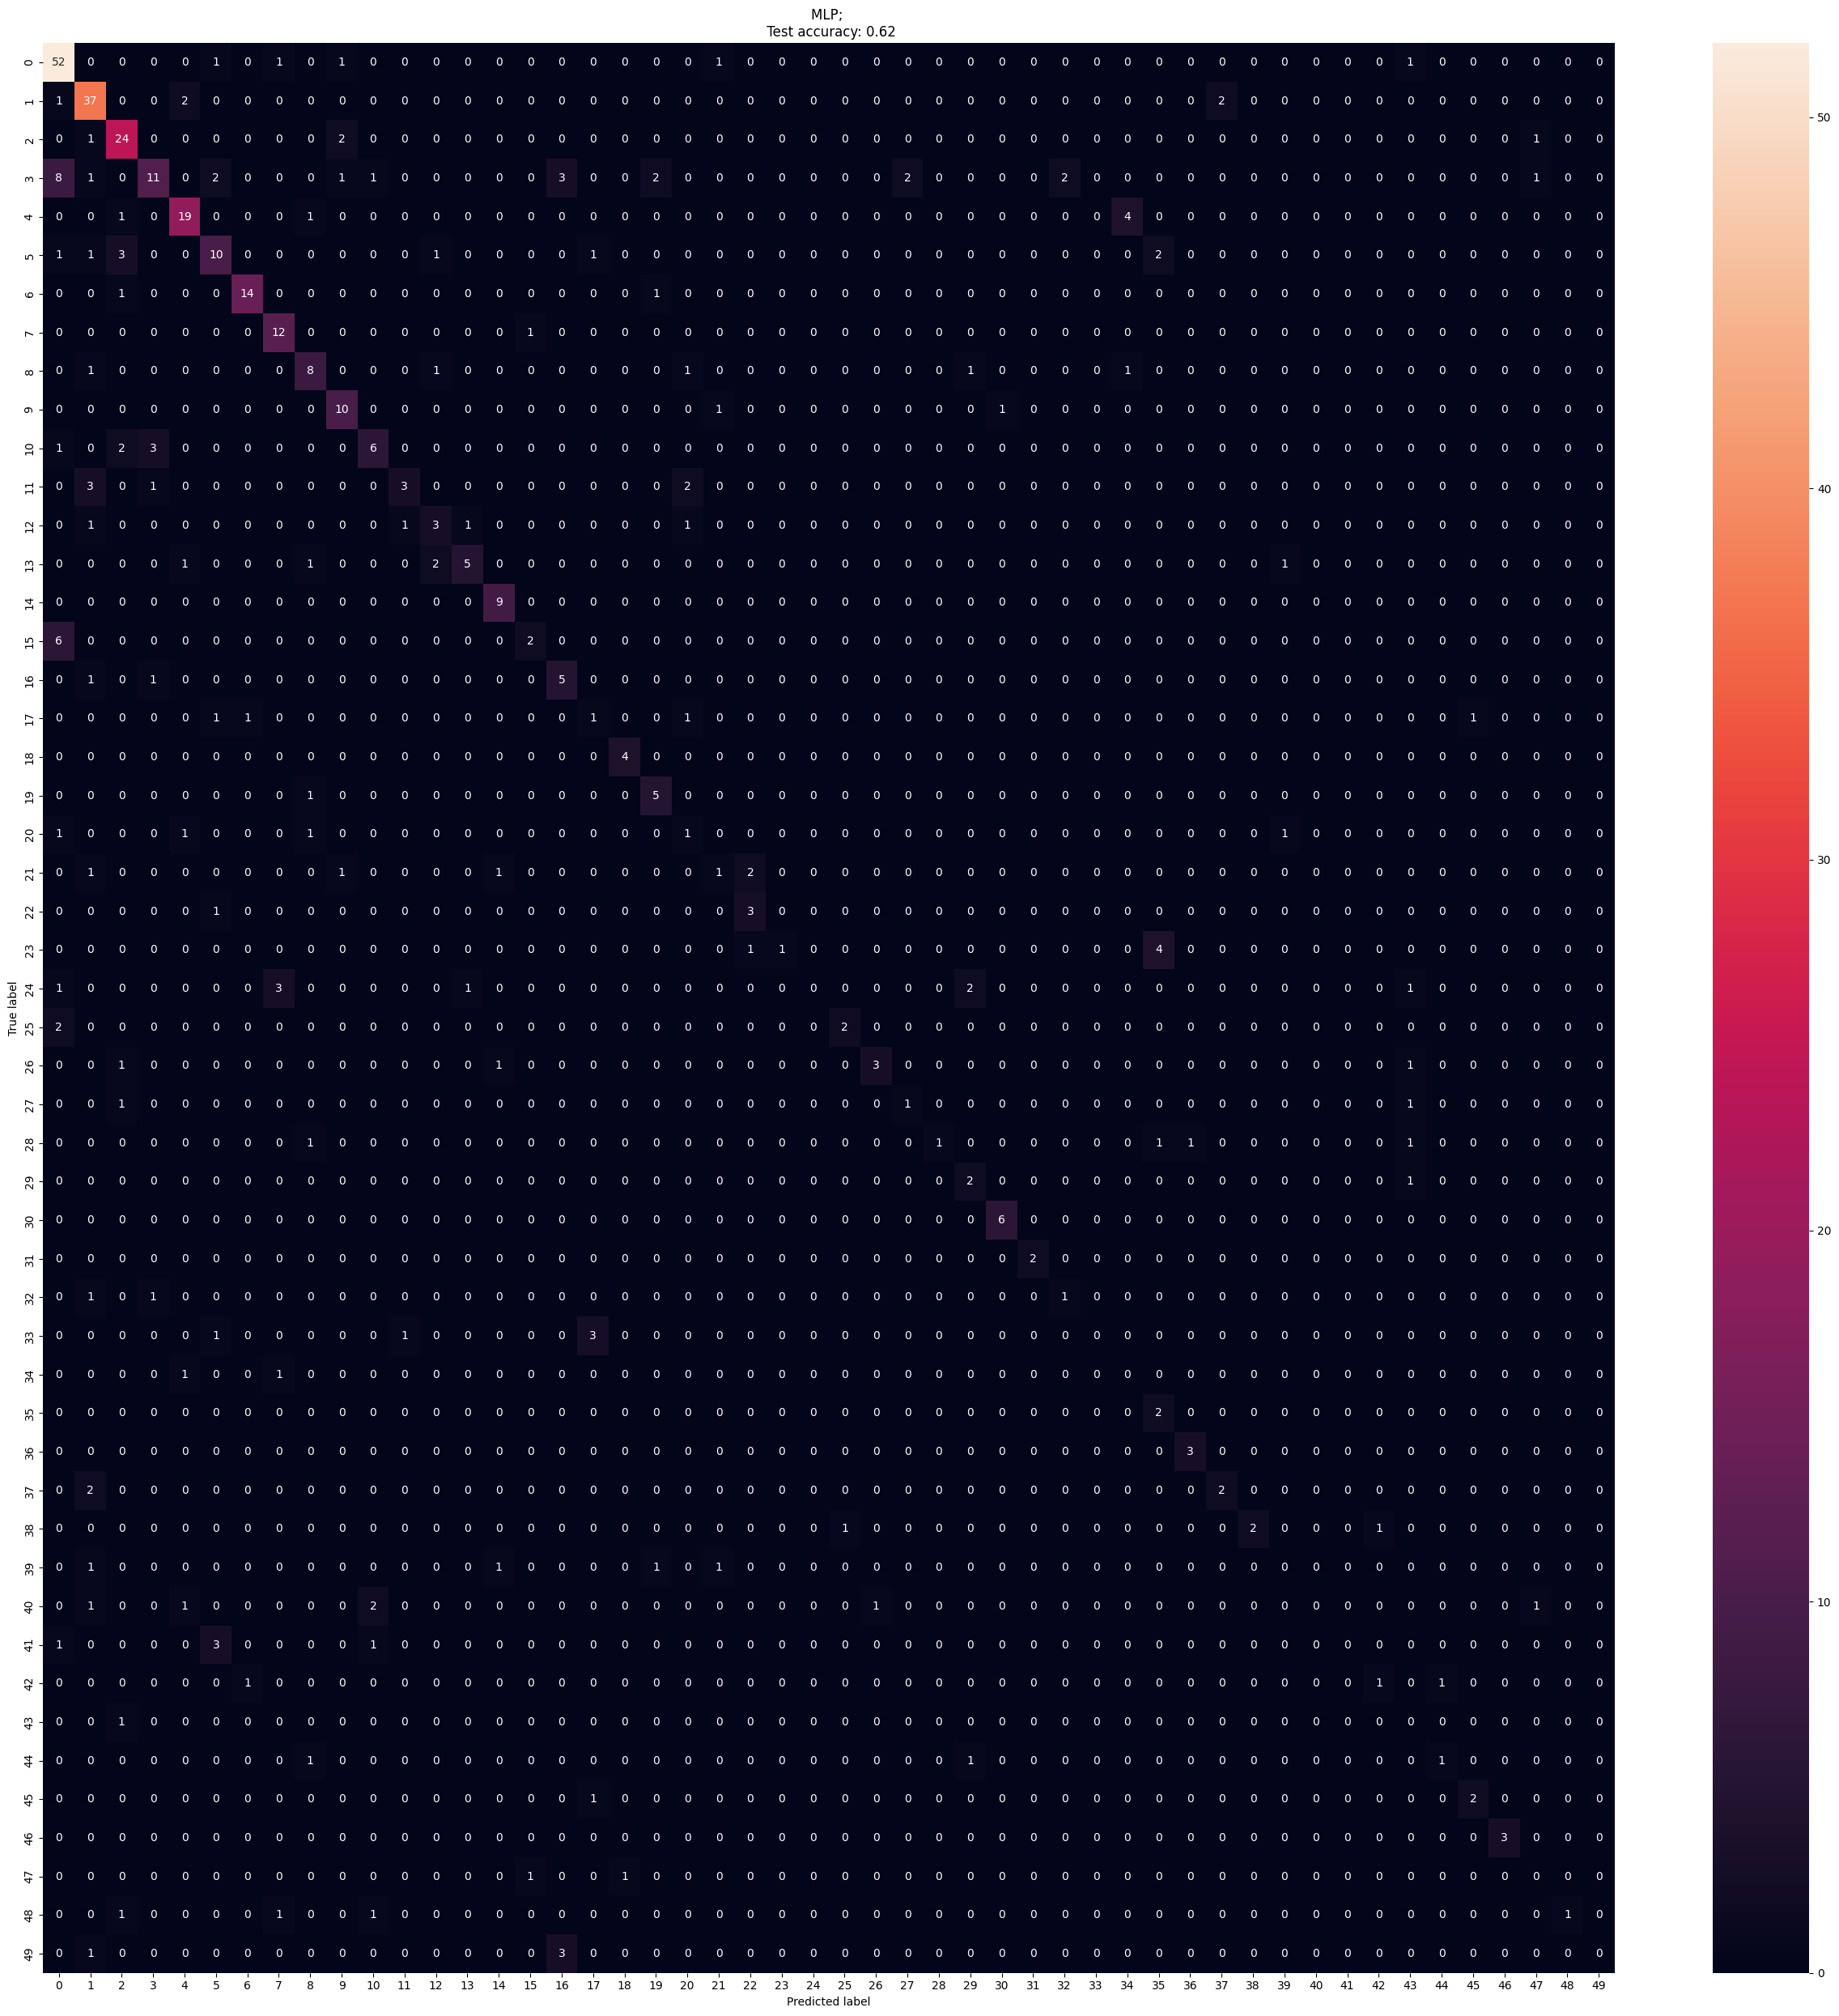

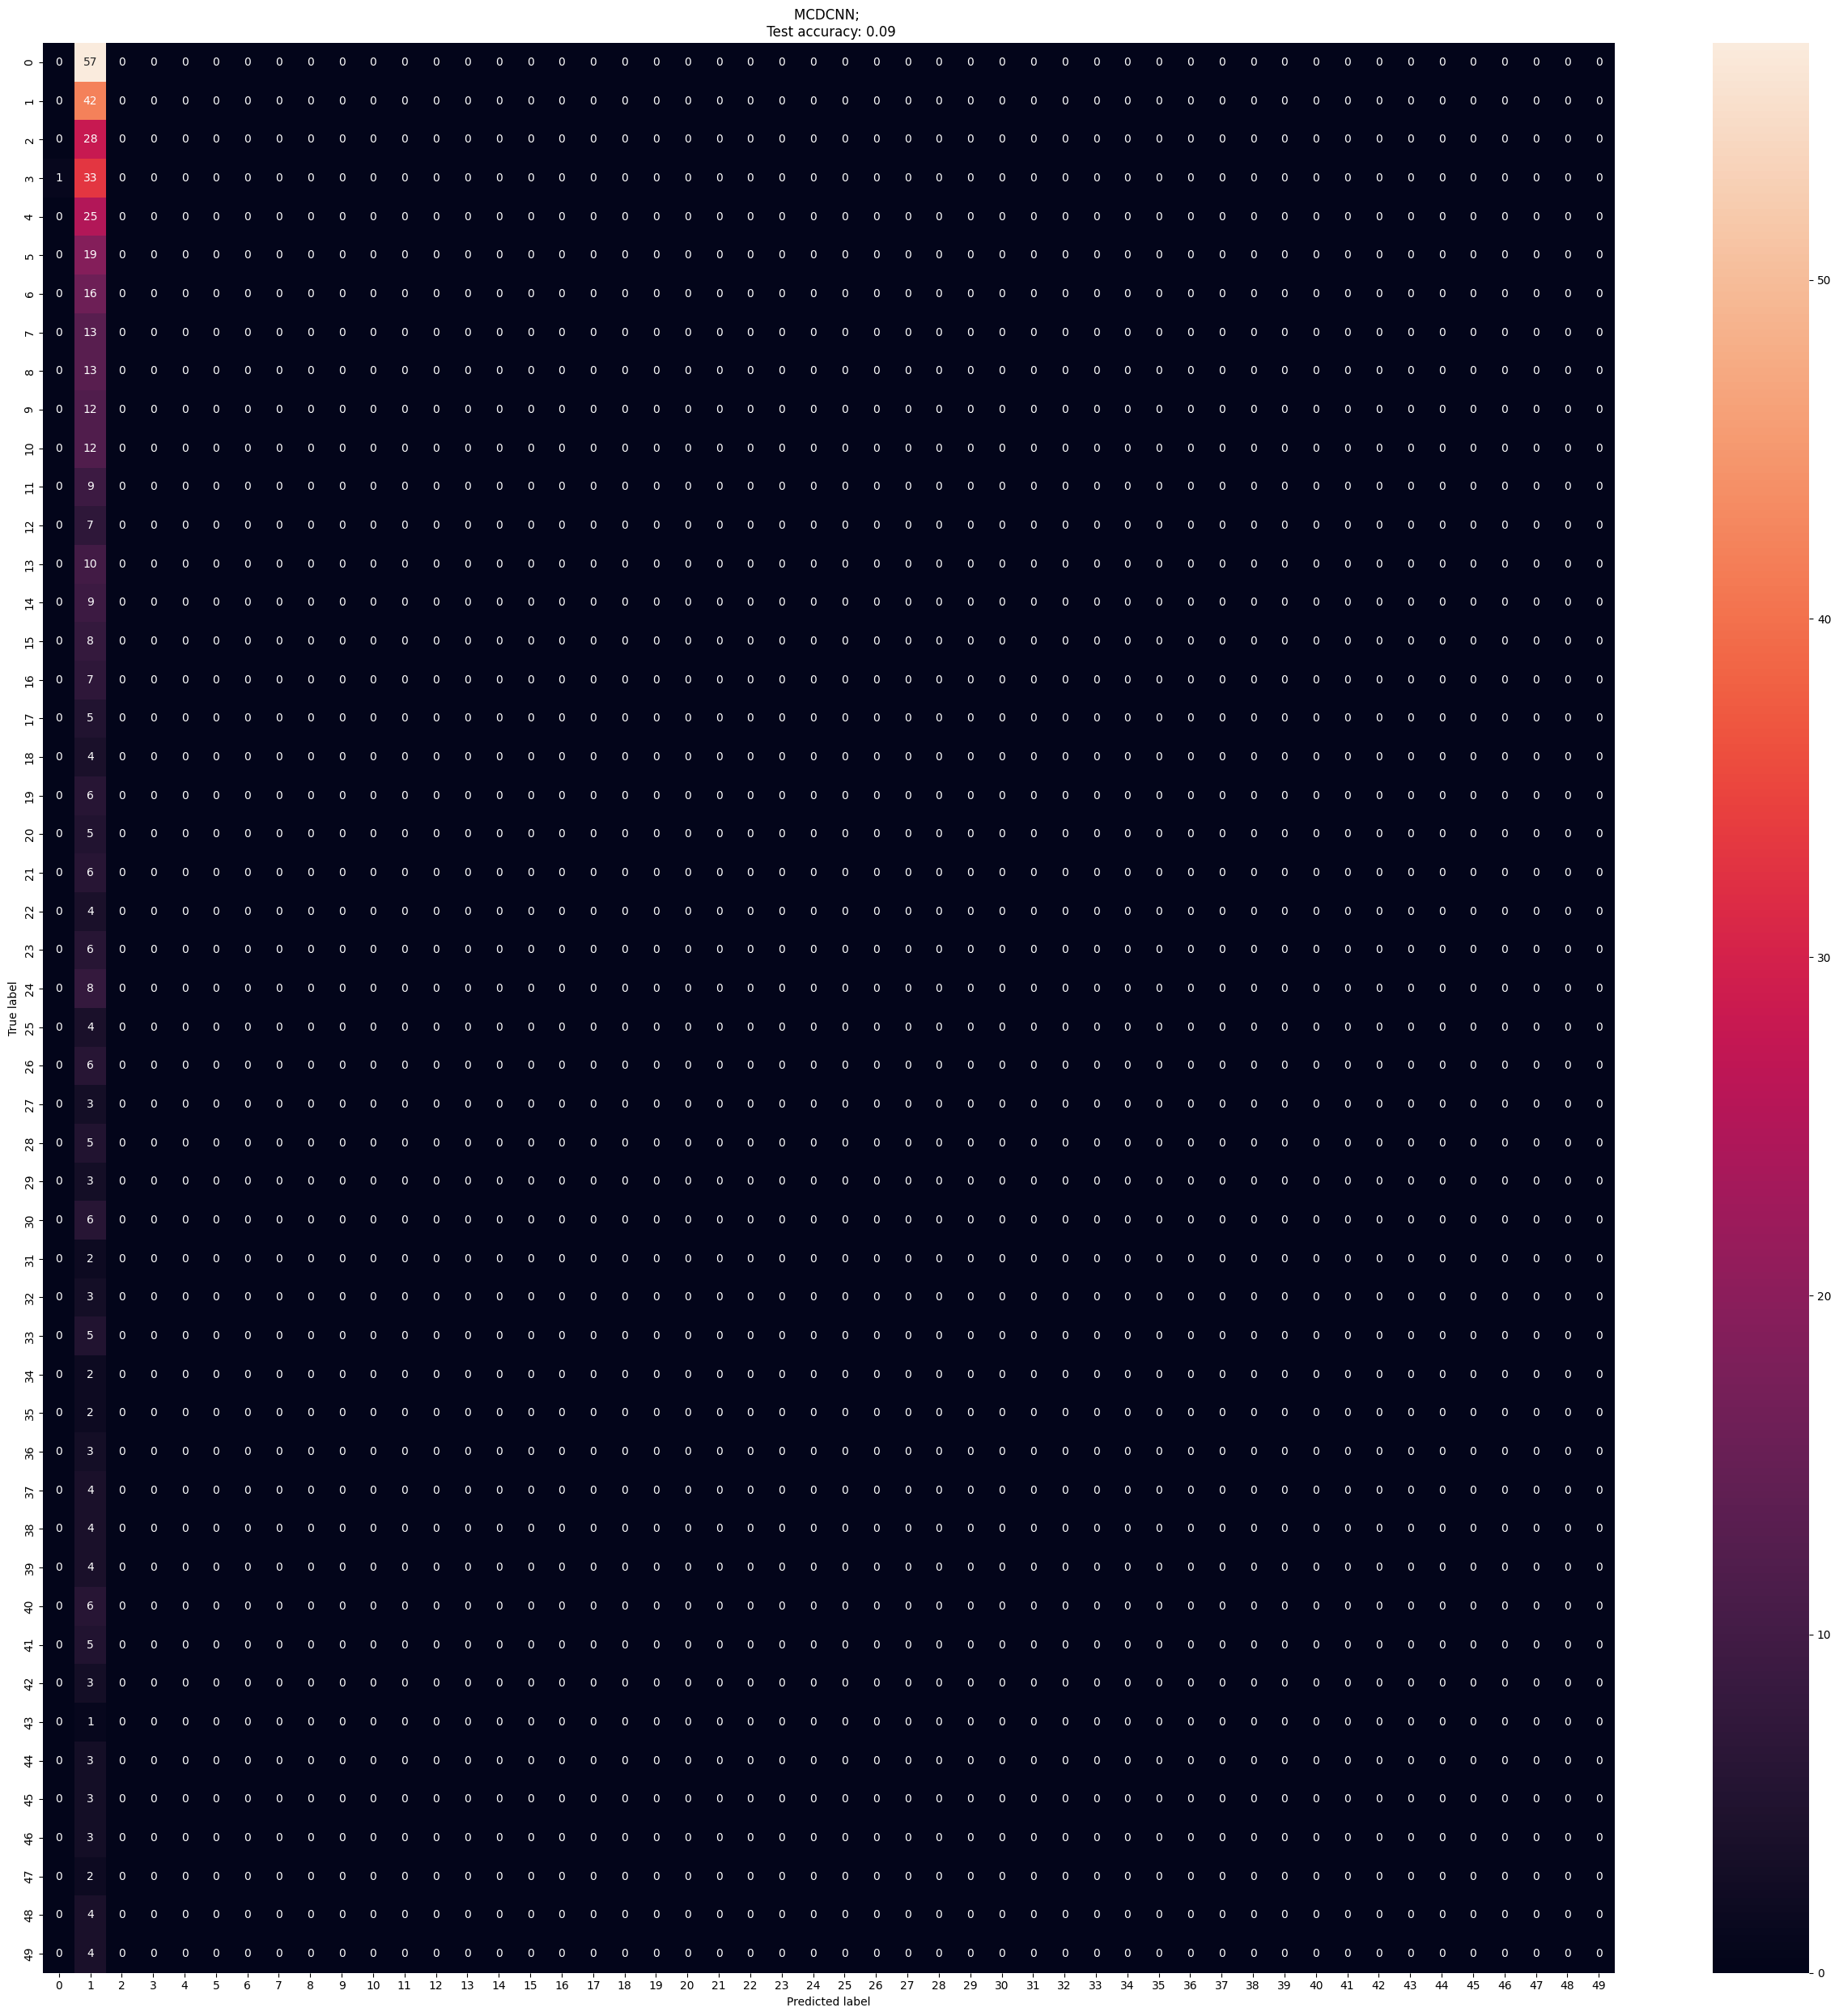

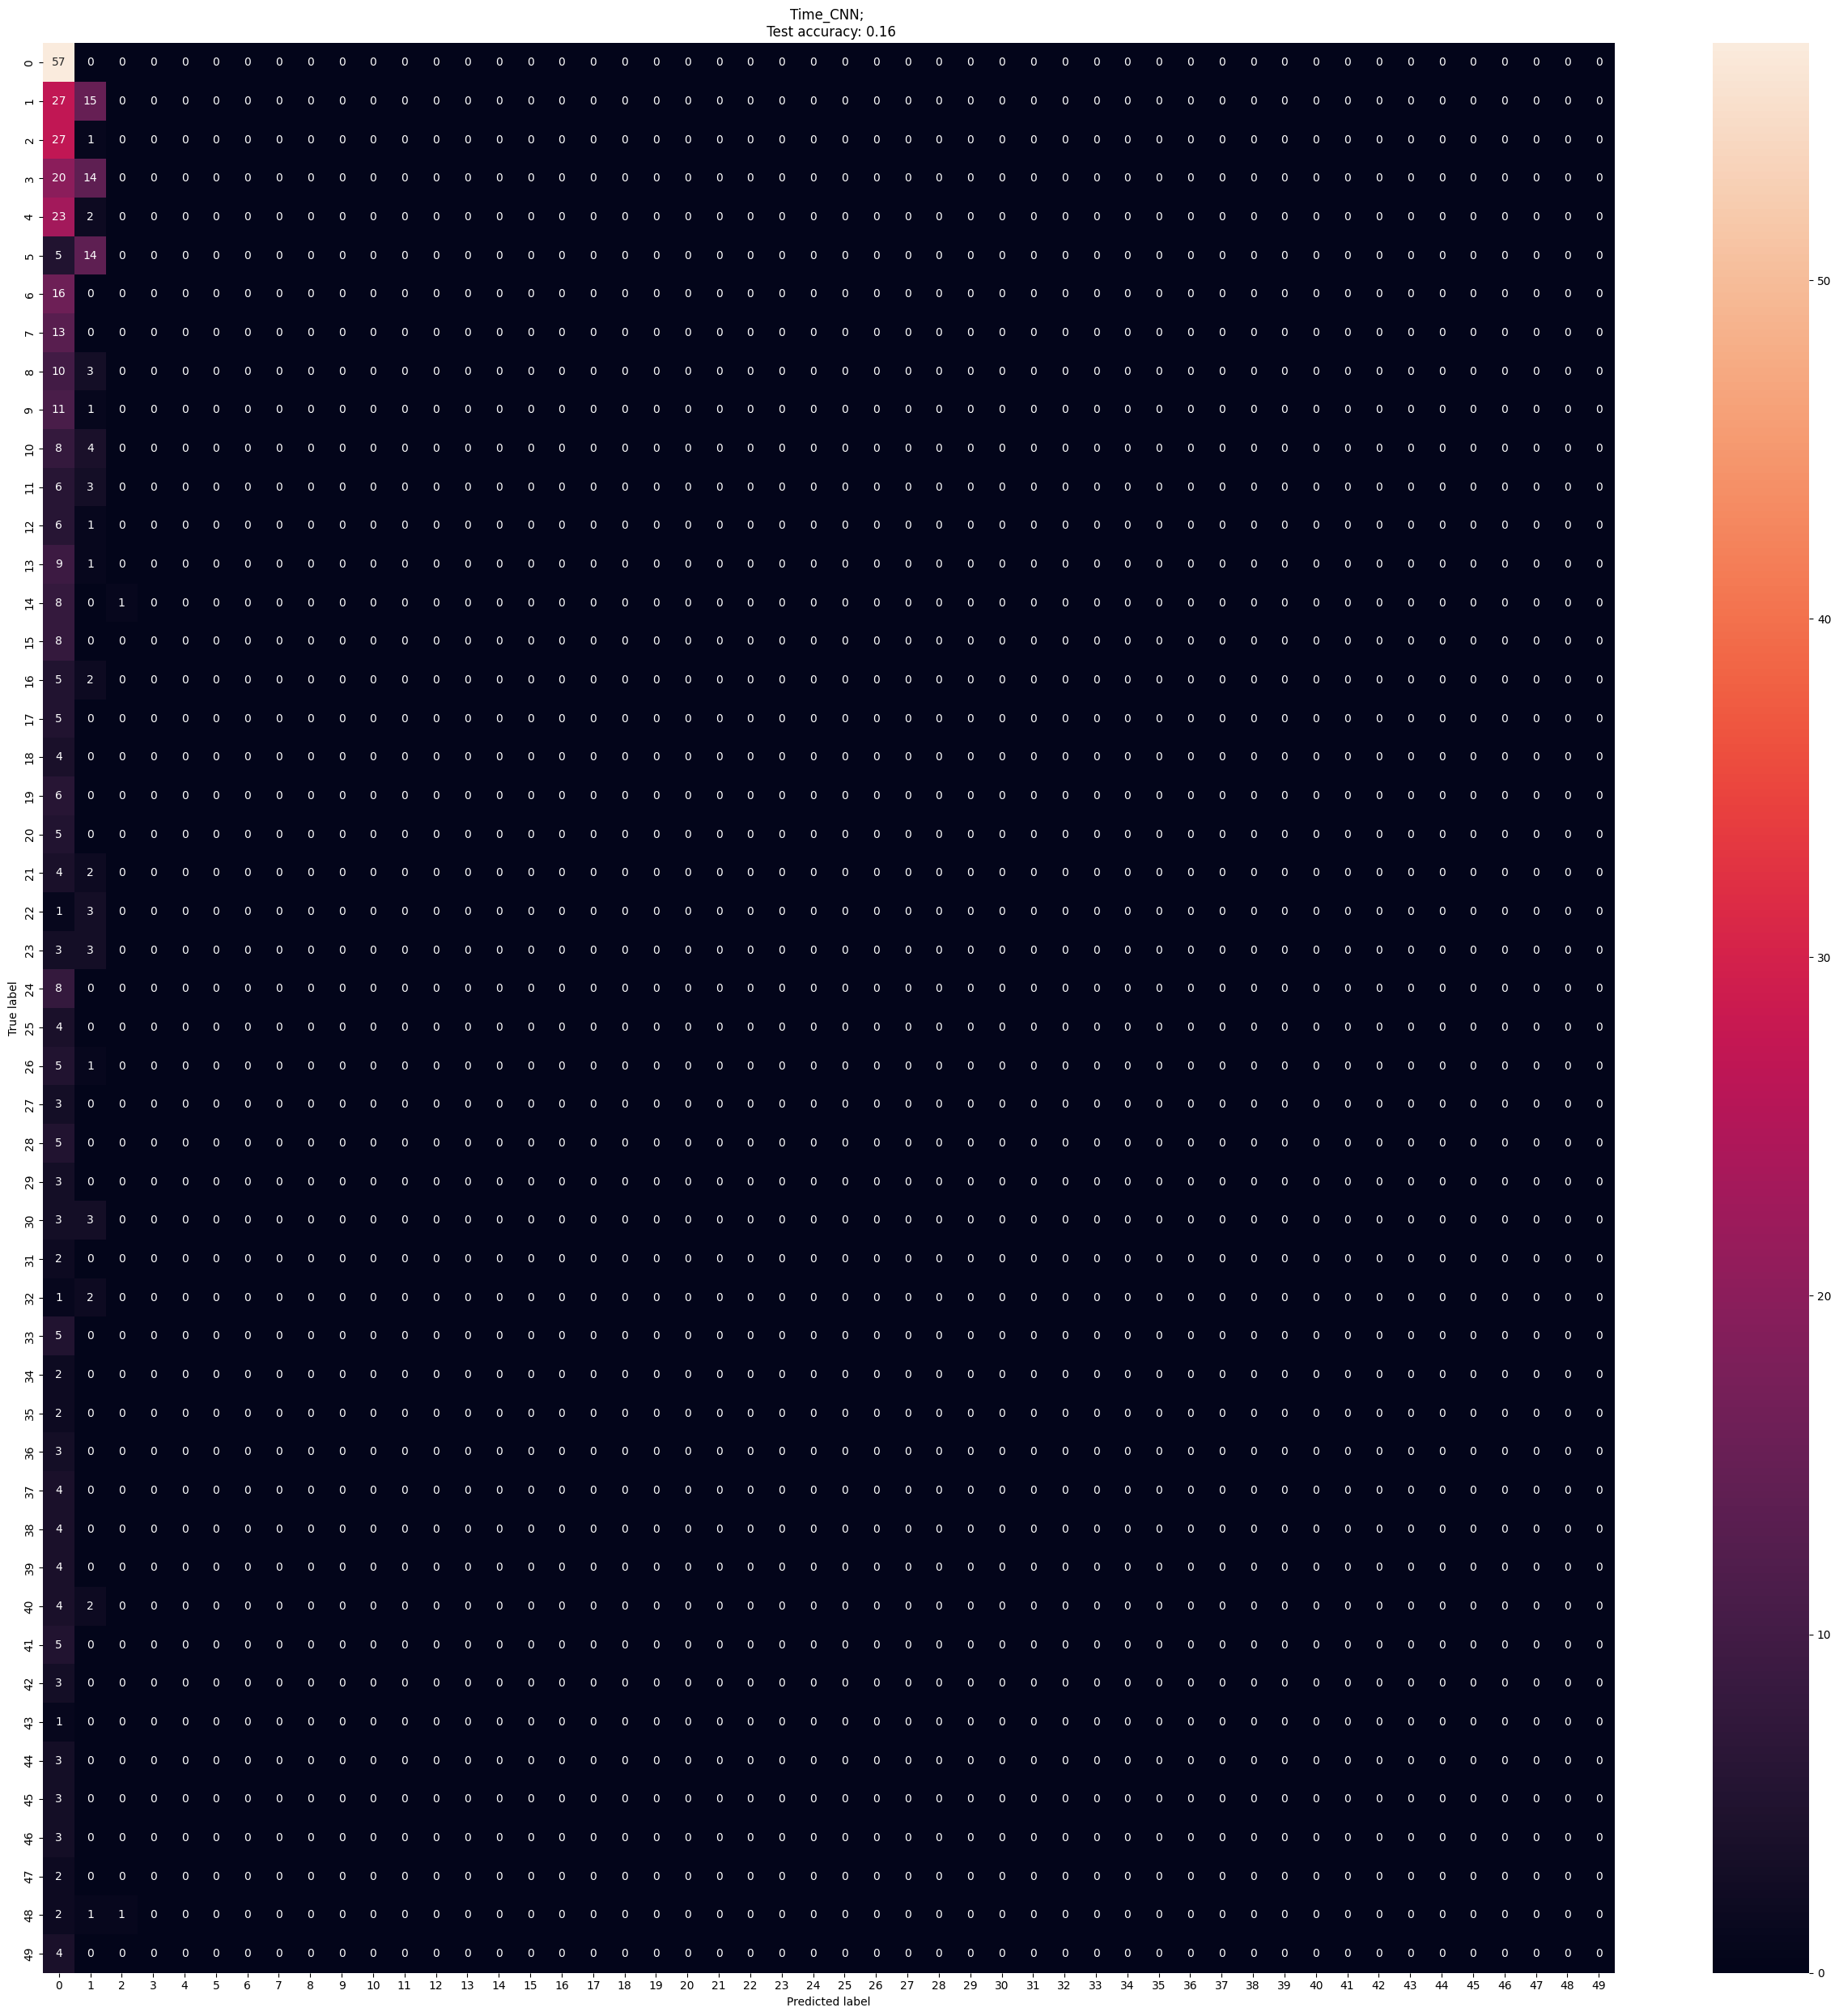

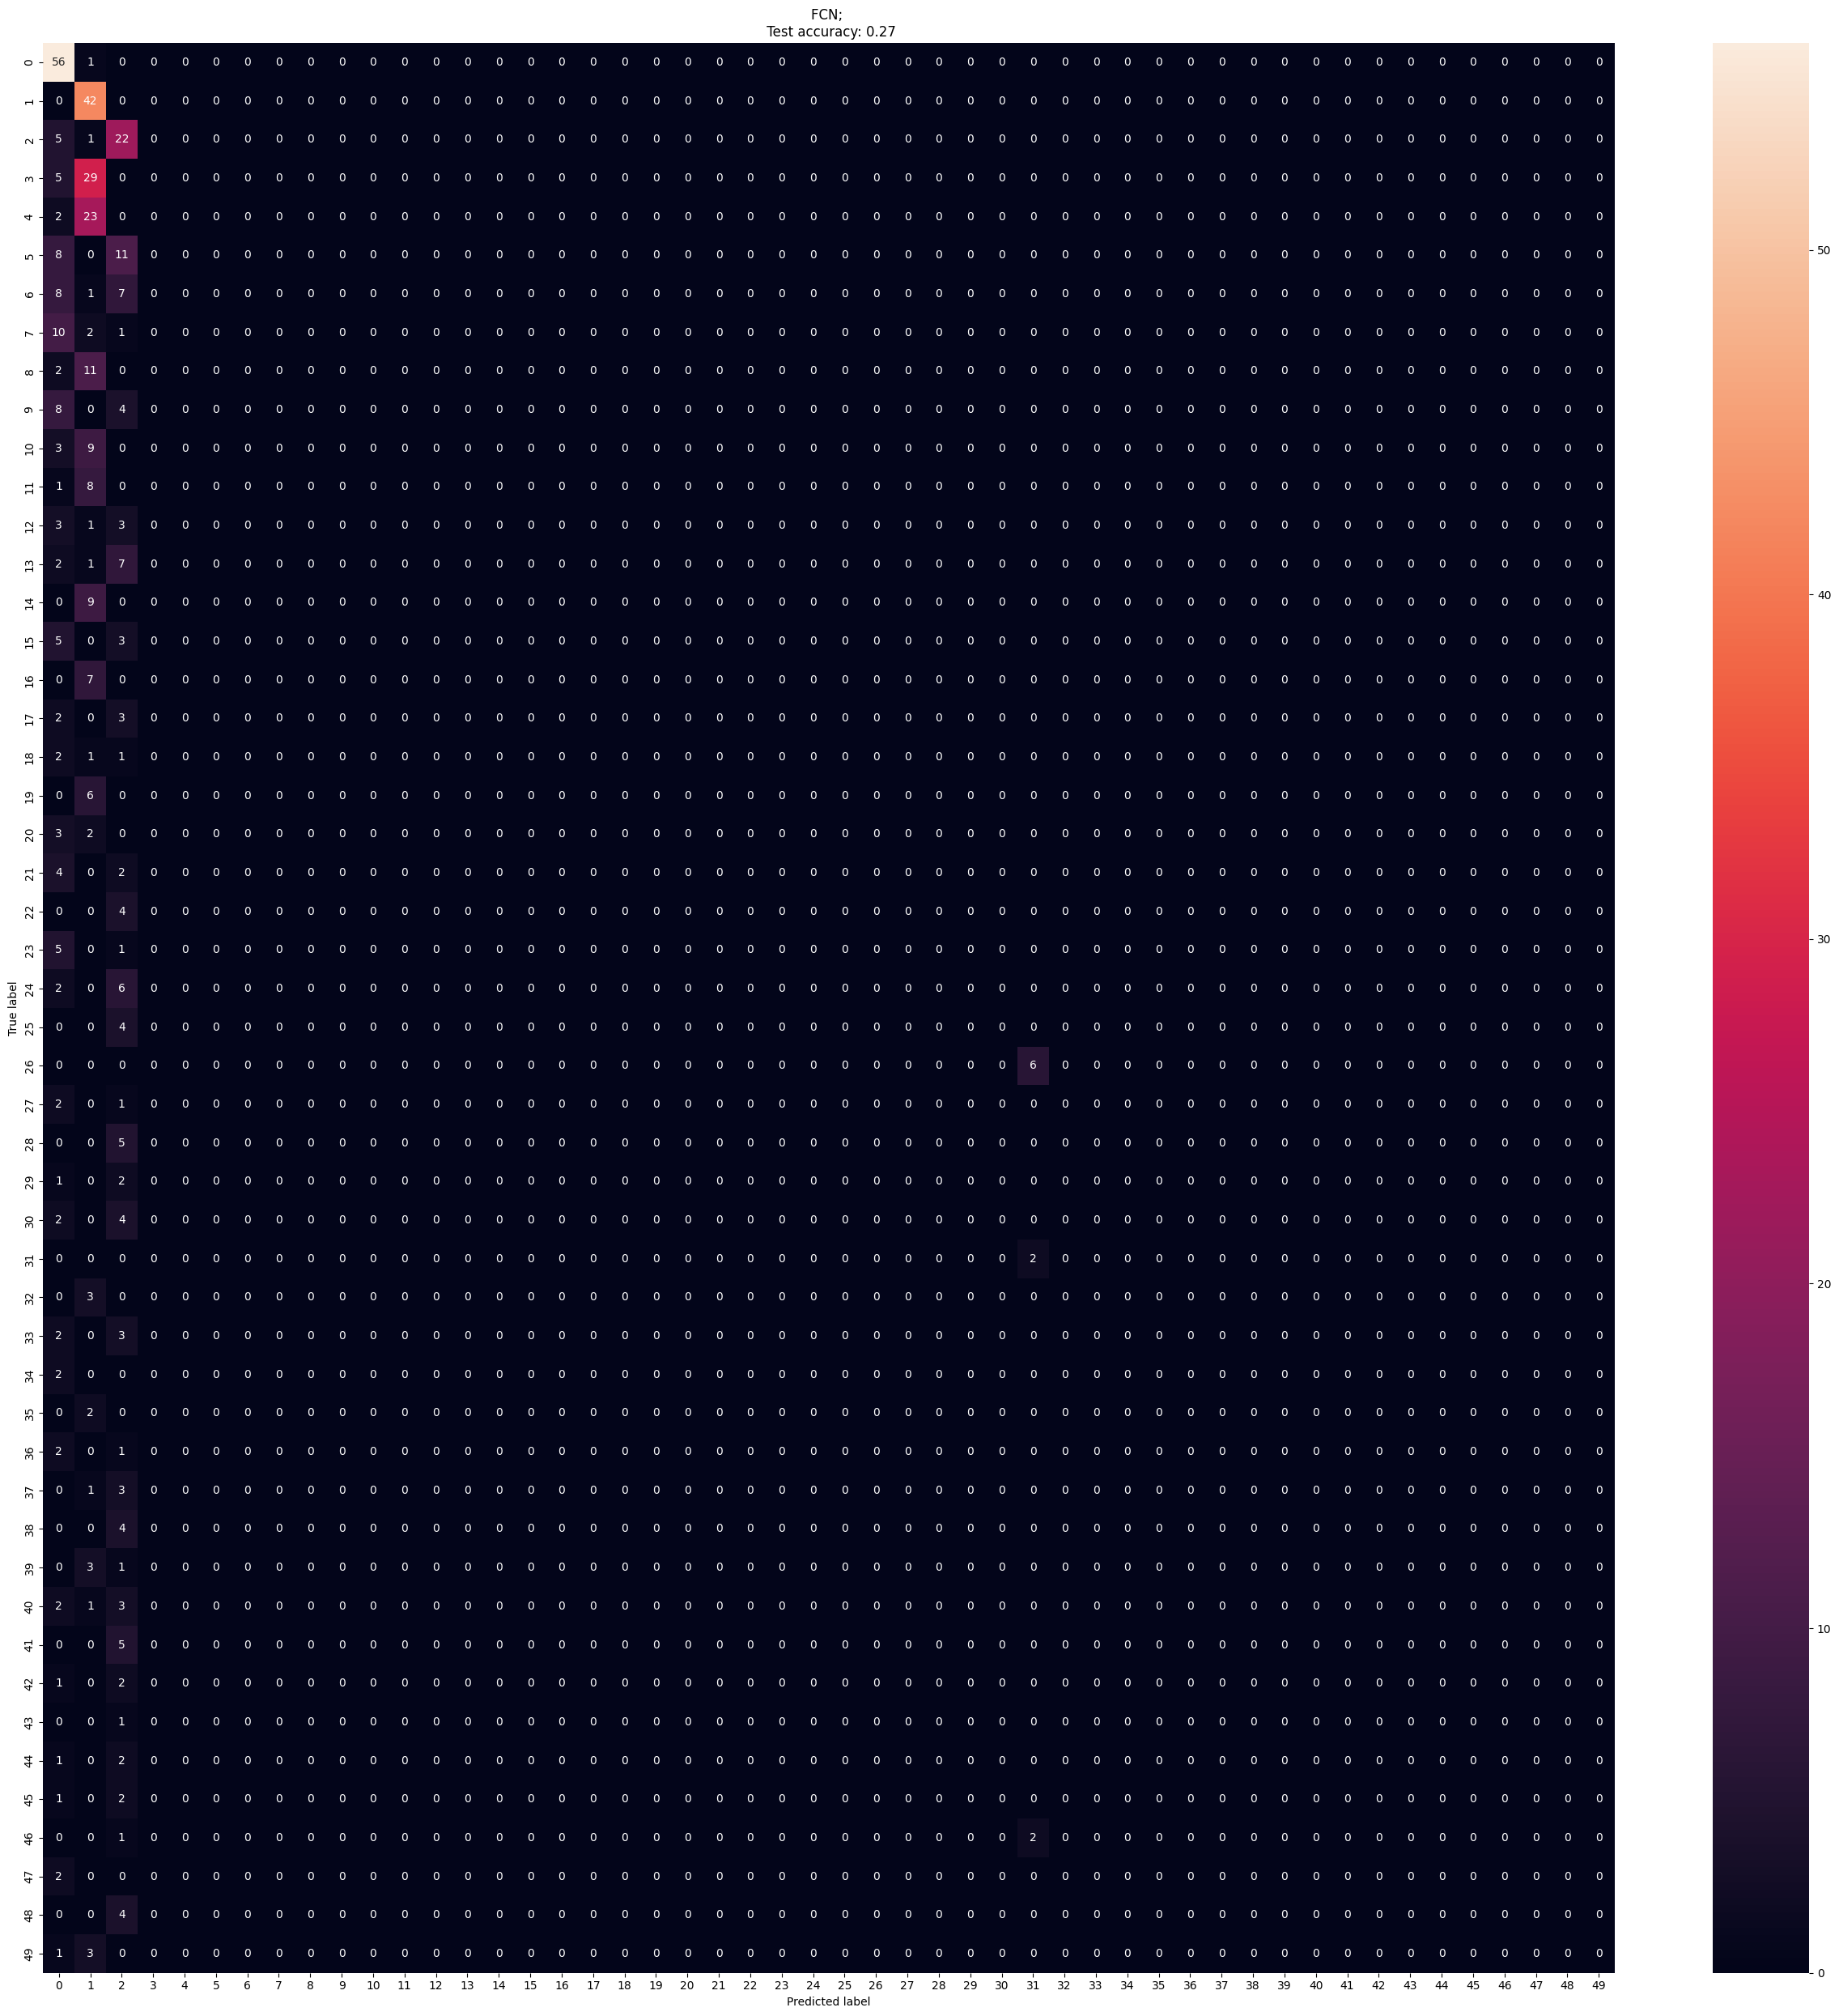

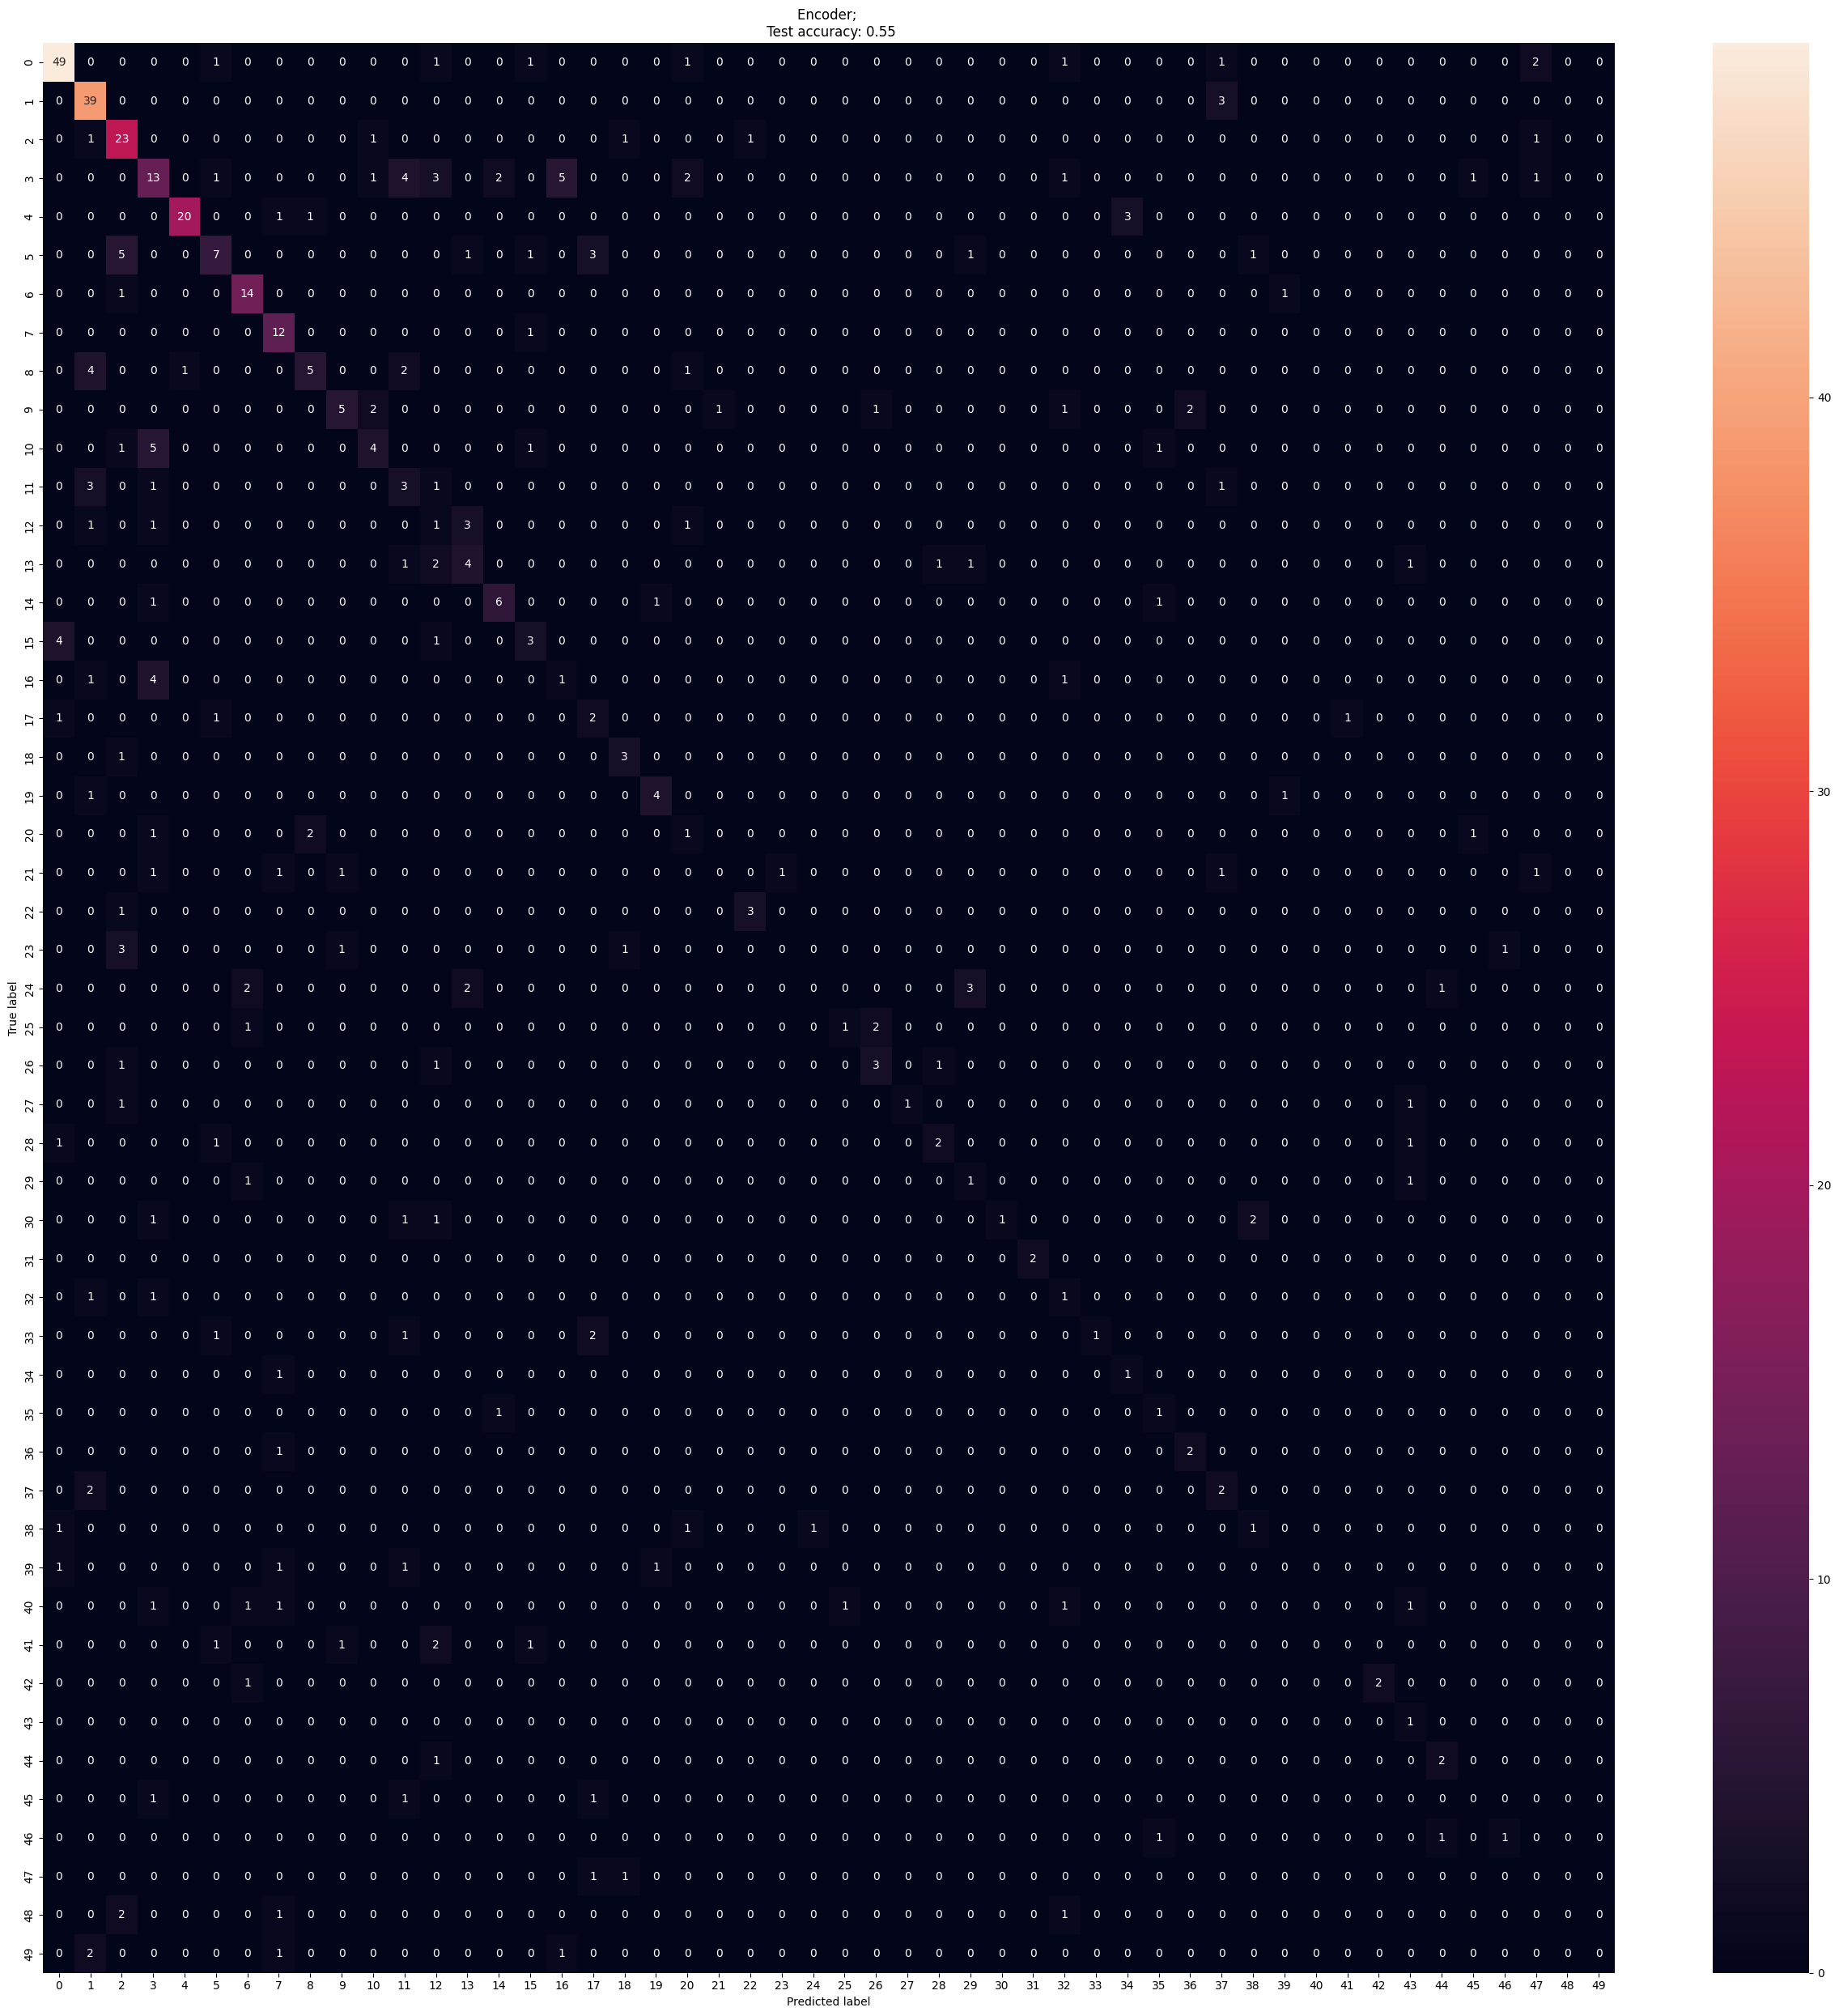

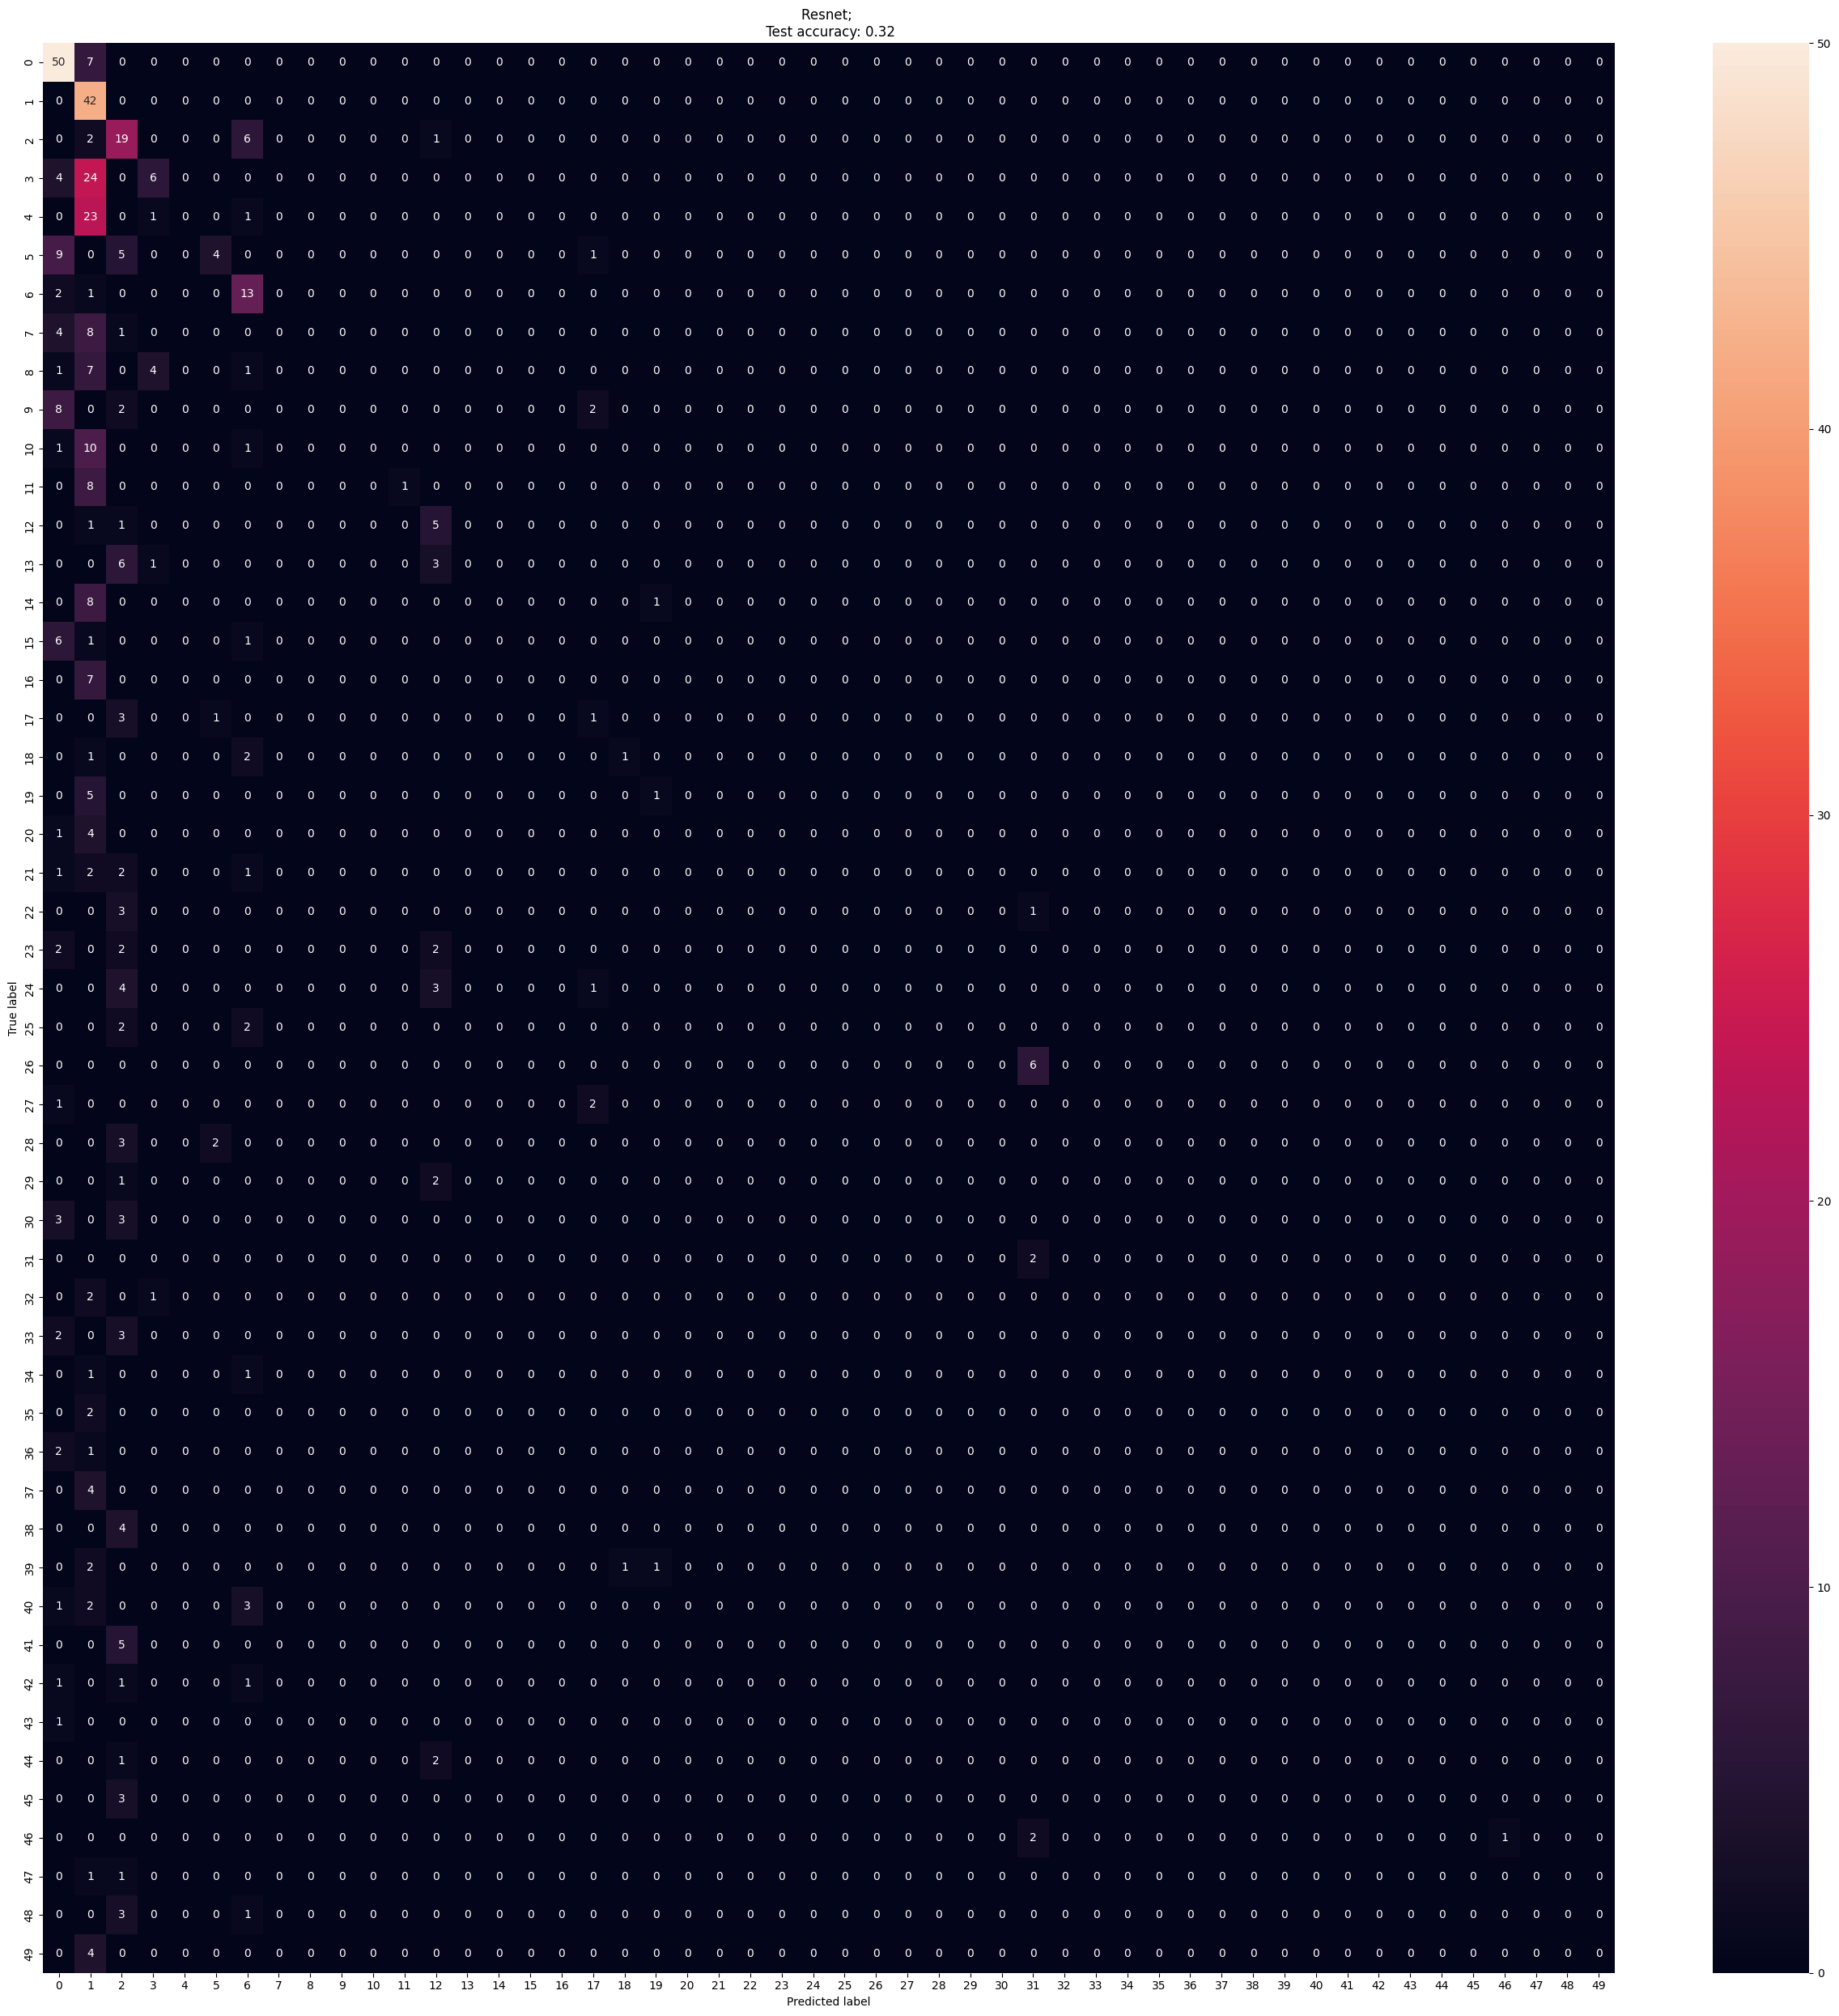

In [16]:
persist_history = False
for dataset_name in ['fifty_words', ]:
    print("Dataset name", dataset_name)
    df_dataset = training_res_df[training_res_df["dataset_name"] == dataset_name]
    num_conf_matr = len(df_dataset)
    if num_conf_matr > 0:
        
        num_horizontal = 2 
        num_vertical = math.ceil(num_conf_matr/num_horizontal)

        conf_matrices = [json.loads(mtr) for i, mtr in df_dataset["confusion_matrix"].iteritems()]
        test_acc = [round(acc, 2) for i, acc in df_dataset["test_acc"].iteritems()]
        model_names = df_dataset["model_name"].values.tolist()
        curr_matr = 0

        for i in range(num_horizontal):
            for j in range(num_vertical):
                #curr_axis = axis[i, j]
                figure, curr_axis = plt.subplots(figsize=(25, 25))
                if curr_matr < len(conf_matrices):
                    sns.heatmap(conf_matrices[curr_matr], annot=True, fmt="d", ax=curr_axis)
                    curr_axis.set_title(f"{model_names[curr_matr]}; \n Test accuracy: {test_acc[curr_matr]}")
                    curr_axis.set_ylabel('True label')
                    curr_axis.set_xlabel('Predicted label')
                    figure.tight_layout()            
                    #figure.savefig(os.path.join(curr_persist_dir, "confusion_matrix.png"))
                    plt.show()
                    plt.close(figure)
                curr_matr += 1

        
        
        if persist_history:
            for _, row in df_dataset.iterrows():
                history = json.loads(row["history"])
                epochs = len(history["loss"])
                model_name = row["model_name"]
                plot_model_history(history=history, epochs=epochs, path_to_persist=os.path.join(curr_persist_dir, f"history_{model_name}.png"))